### Decicion Trees

<Figure size 600x450 with 0 Axes>

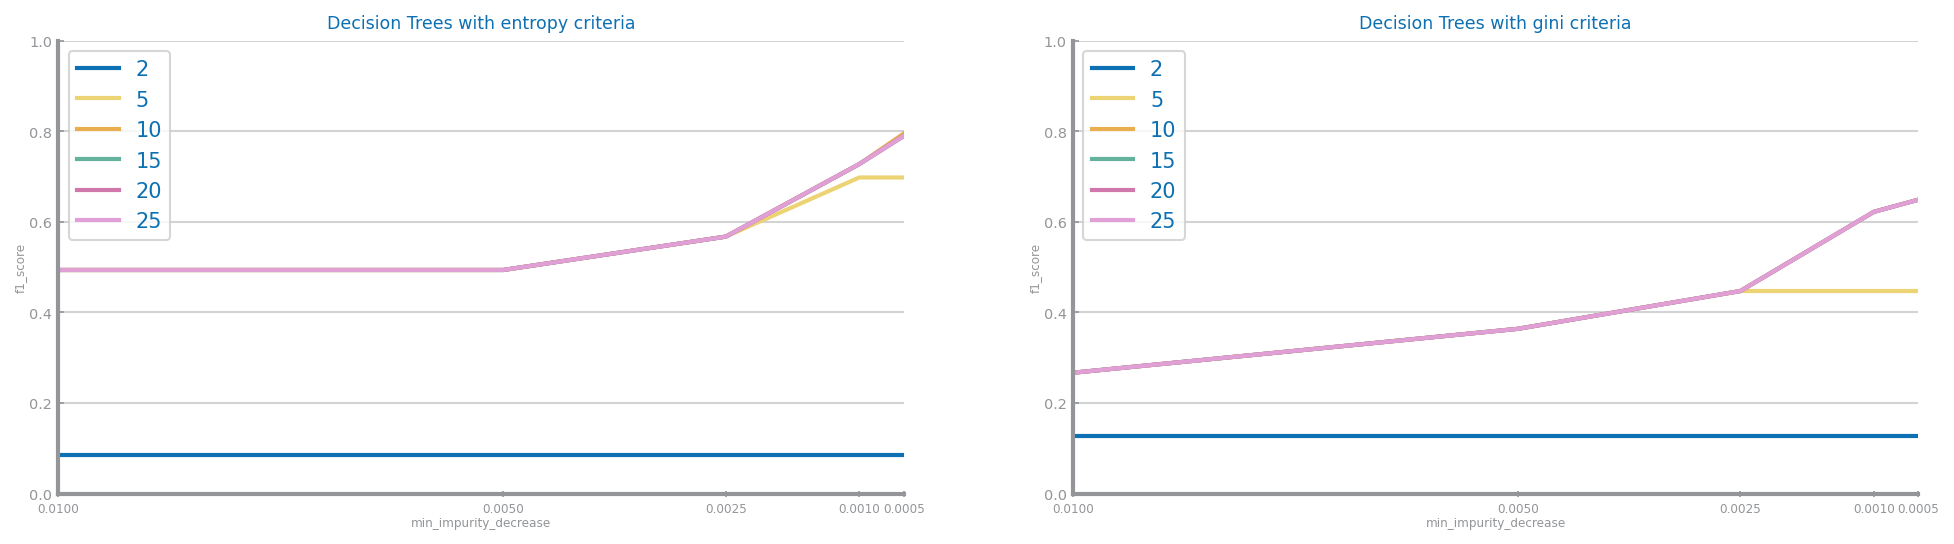

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.00 ==> f1_score=0.79


In [2]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.tree import DecisionTreeClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
import libs.ds_charts
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

file_tag = 'nyc_collisions_scaled_zscore'
filename = 'data/nyc_collisions_scaled_zscore'
target = 'PERSON_INJURY'

train: DataFrame = read_csv(f'{filename}_train_smote.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(f1_score(tstY, prdY, pos_label = 'Killed'))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_model = tree

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='f1_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_f1.png')
show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> f1_score=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

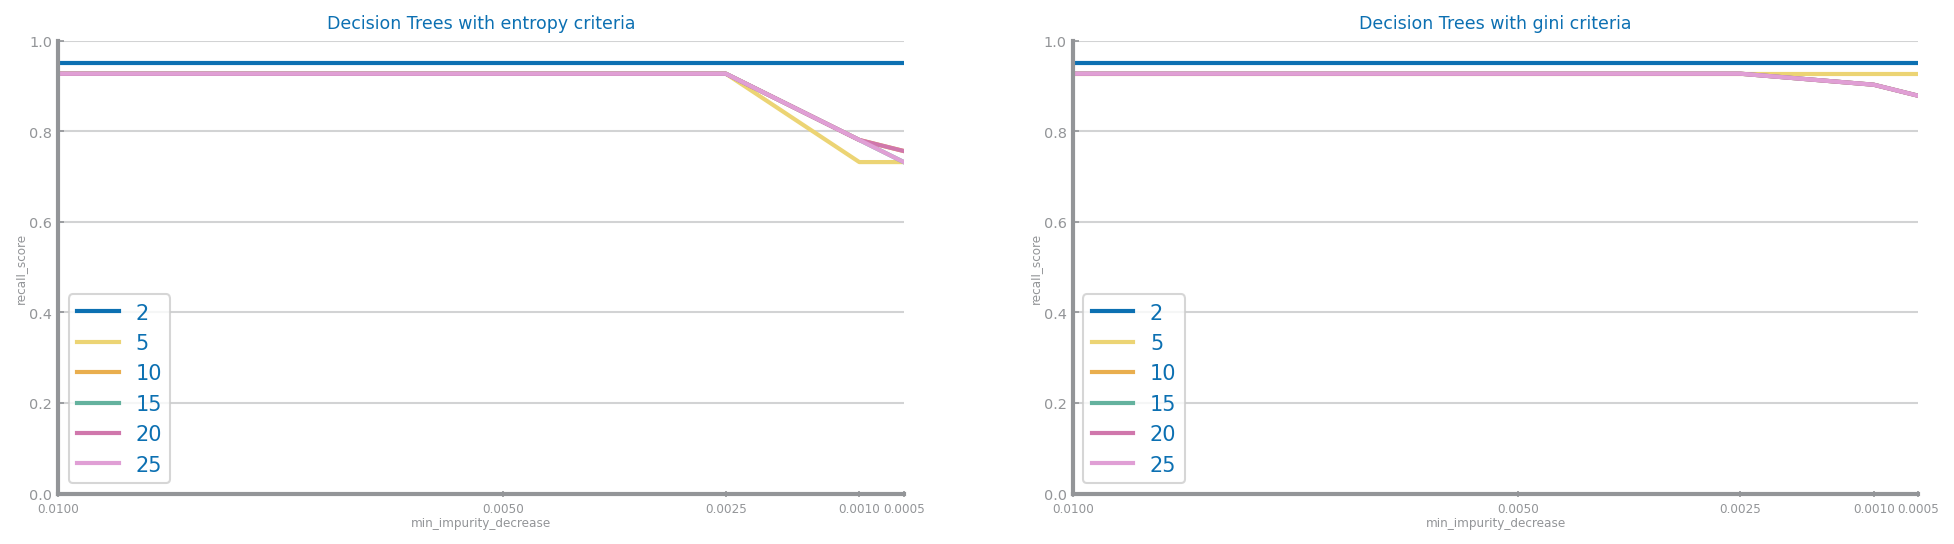

In [23]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(recall_score(tstY, prdY, pos_label = 'Killed'))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_model = tree

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='recall_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_recall.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

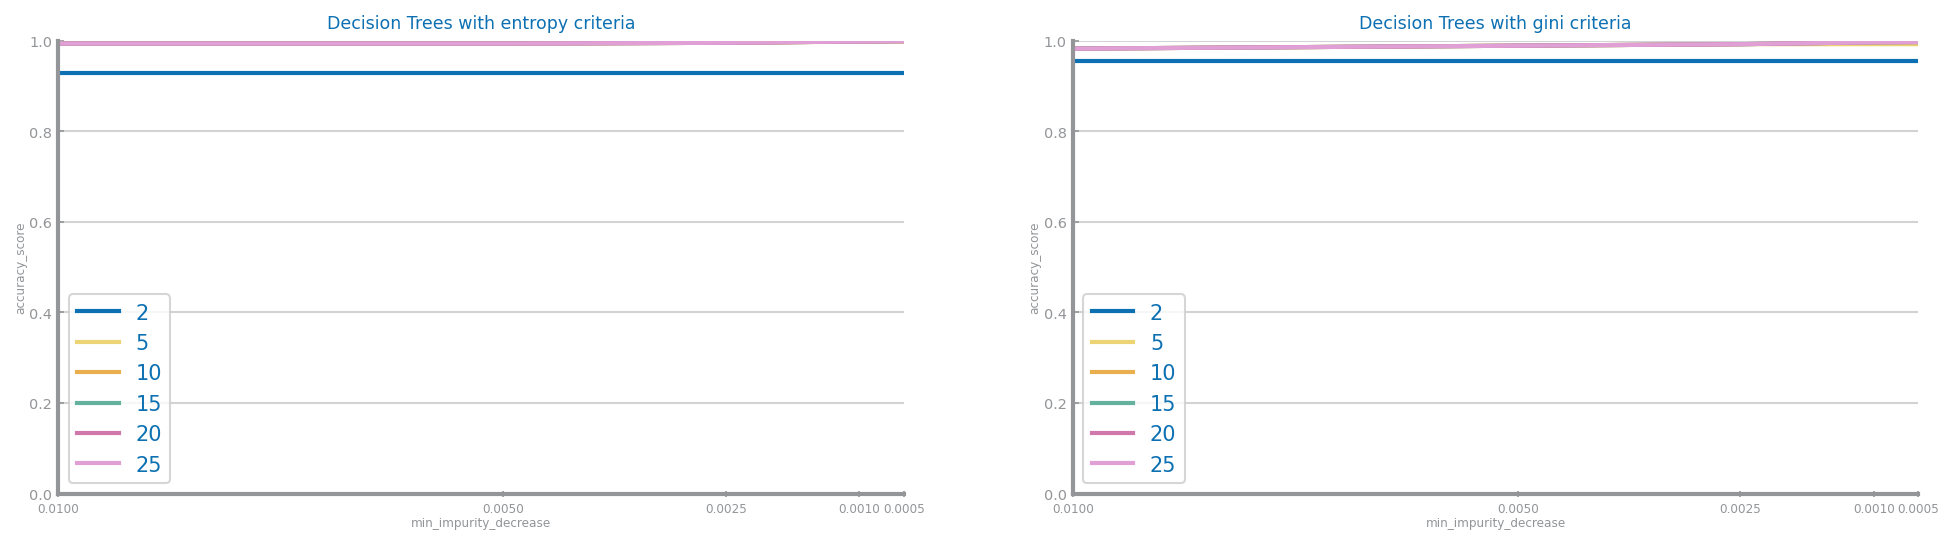

In [24]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_model = tree

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='accuracy_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_accuracy.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

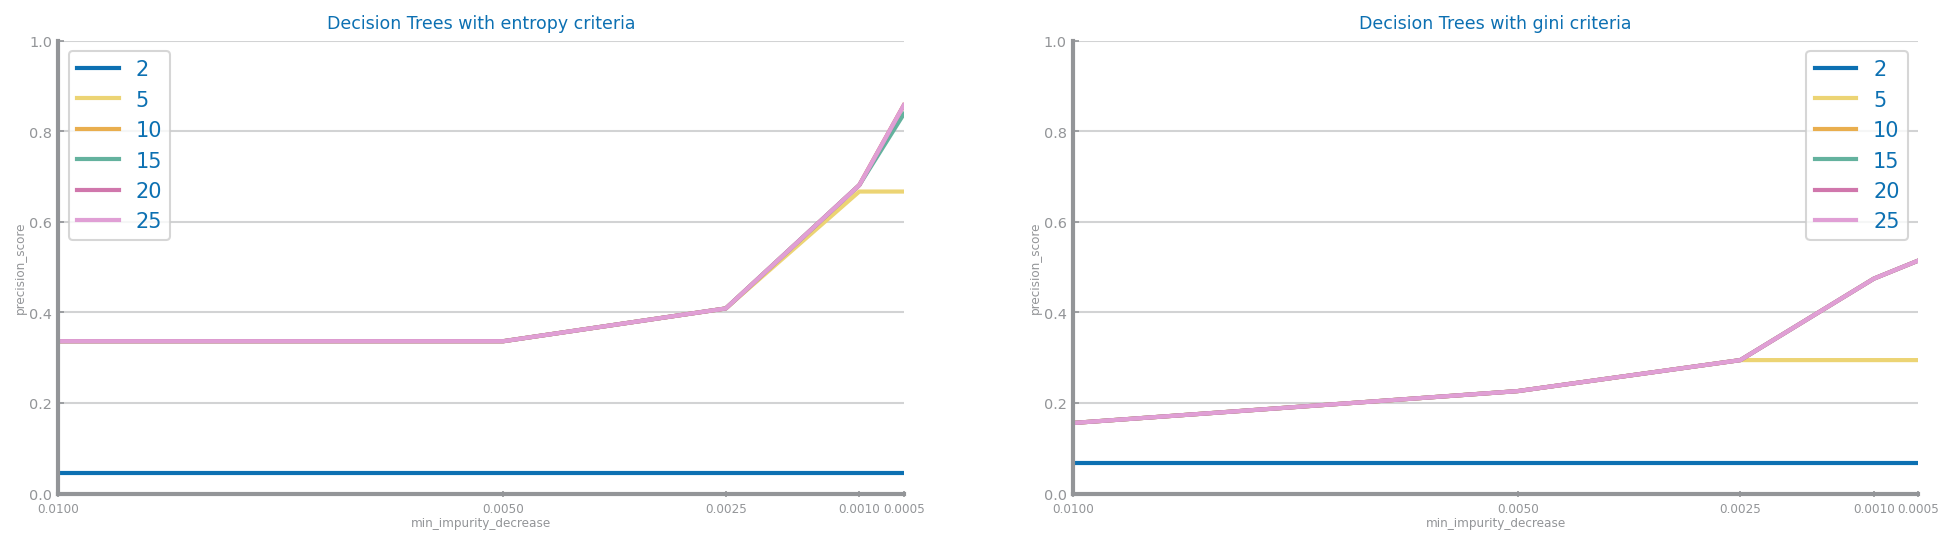

In [25]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(precision_score(tstY, prdY, pos_label = 'Killed'))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_model = tree

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='precision_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_precision.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

### Confusion Matrix of the Best Model

entropy
10
0.0005


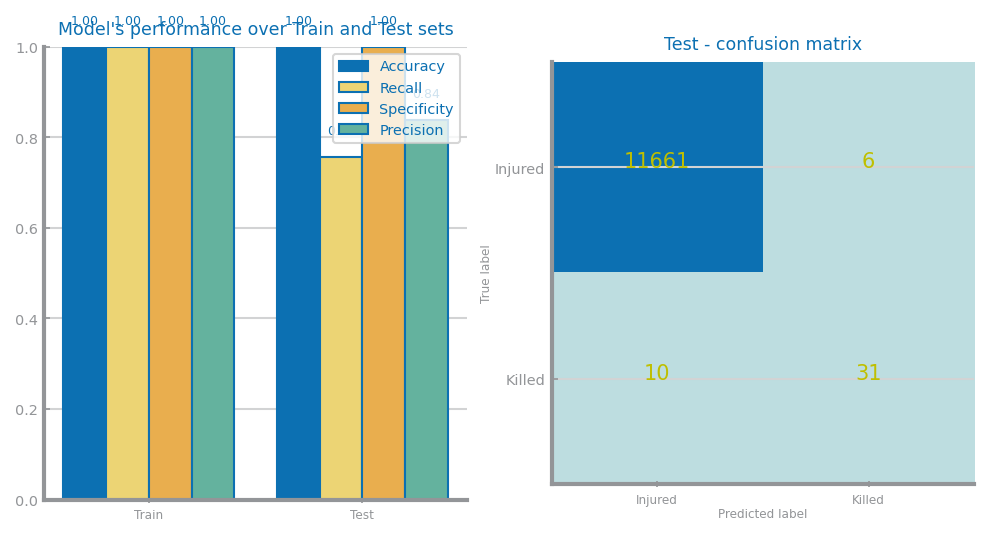

In [26]:
clf = DecisionTreeClassifier(criterion=best[0], max_depth=best[1], min_impurity_decrease=best[2])
print(best[0])
print(best[1])
print(best[2])

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig('lab5_imagens/nyc_collisions_confusion_matrix_best_tree.png')
show()

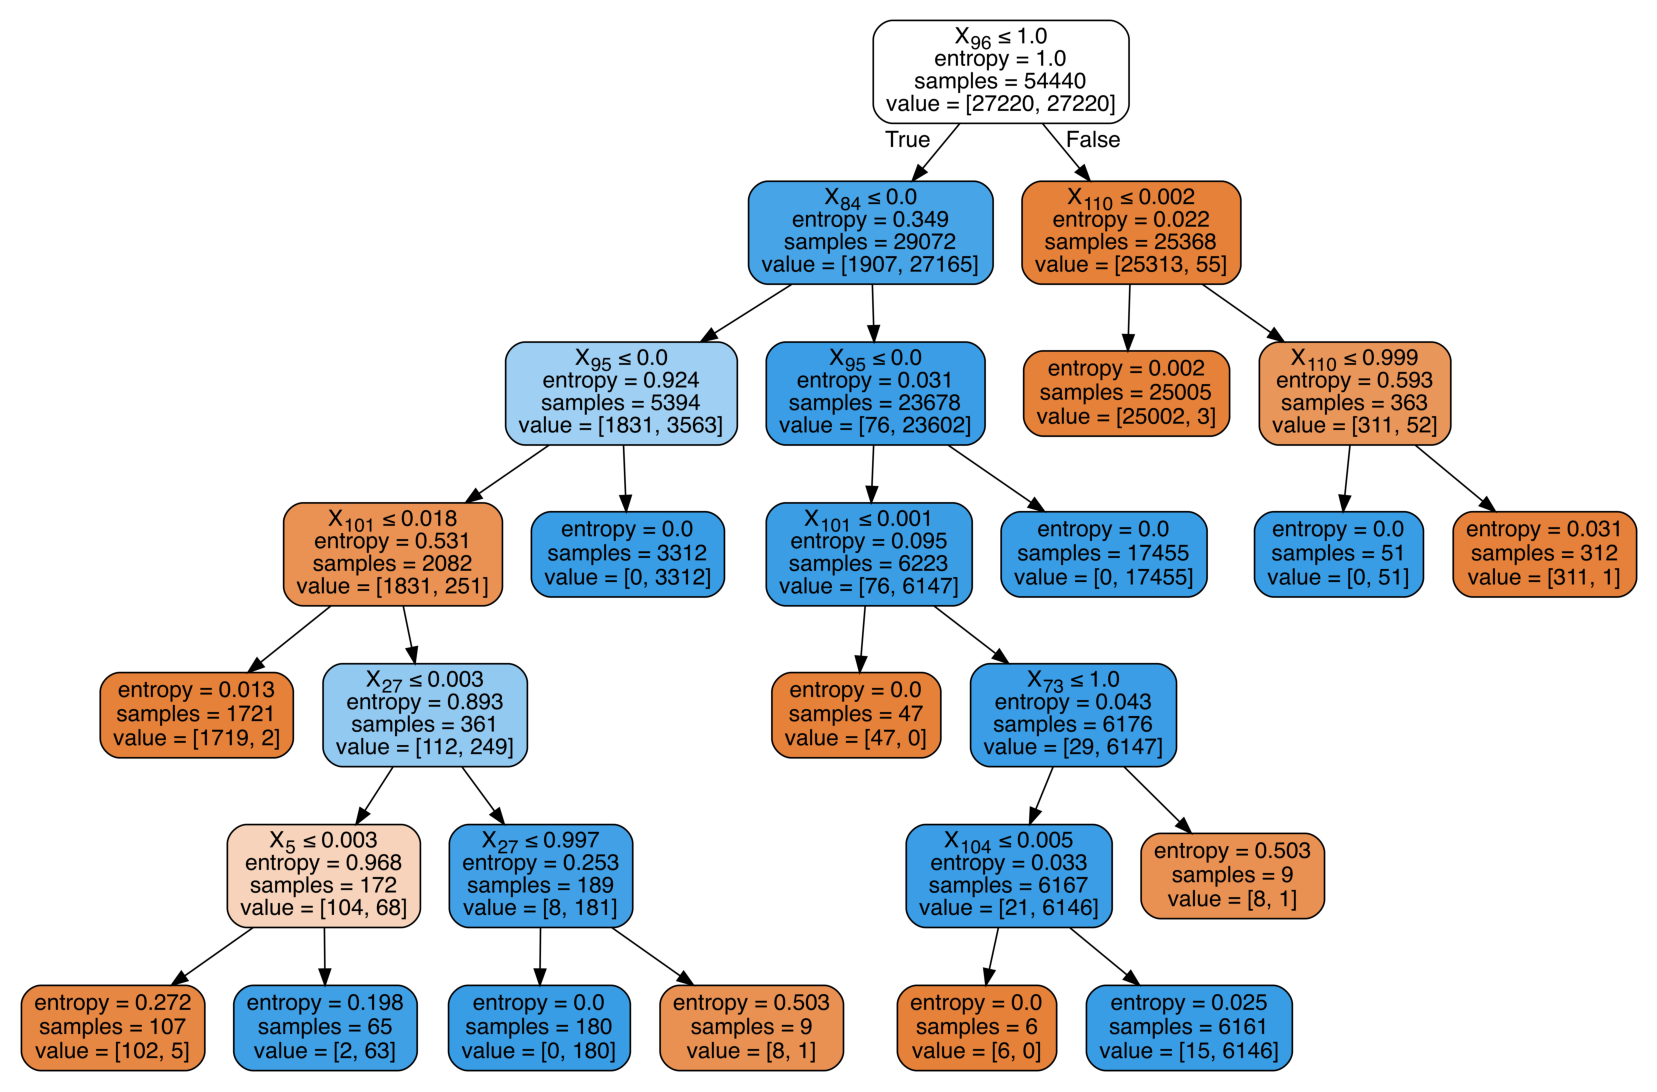

In [27]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis

file_tree = 'lab5_imagens/best_tree.png'

dot_data = export_graphviz(best_model, out_file='lab5_imagens/best_tree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'images/best_tree.dot', '-o', file_tree, '-Gdpi=600'])

figure(figsize = (14, 18))
imshow(imread(file_tree))
axis('off')
show()

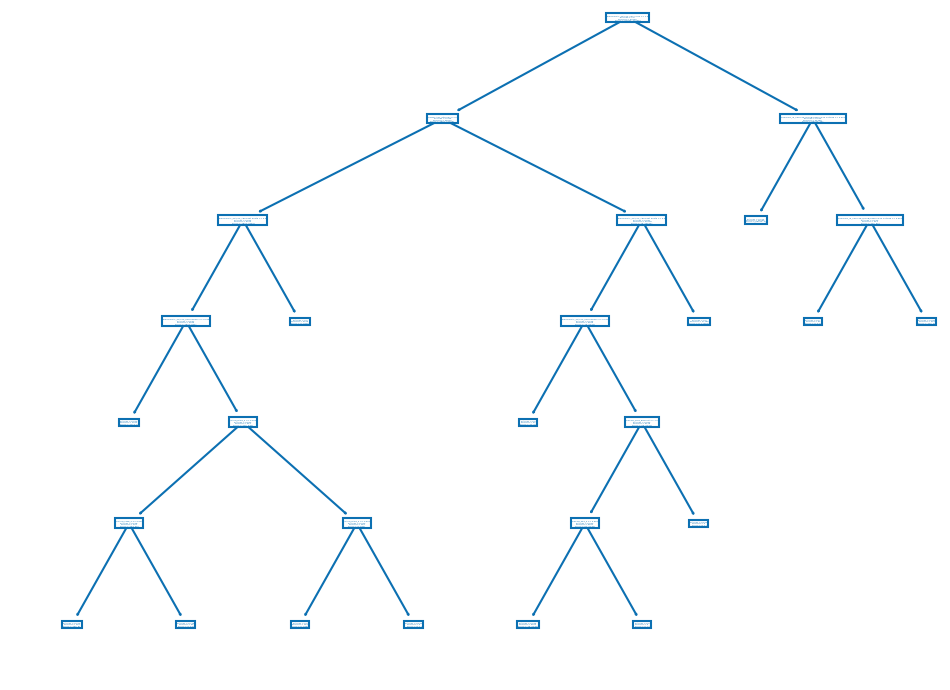

In [28]:
from sklearn import tree

labels = [str(value) for value in labels]
tree.plot_tree(best_model, feature_names=train.columns, class_names=labels)
savefig(f'lab5_imagens/{file_tag}_dt_best_tree.png')

1. feature EMOTIONAL_STATUS_Conscious (0.8072161086007376)
2. feature COMPLAINT_Internal (0.08177944170495471)
3. feature EMOTIONAL_STATUS_Apparent Death (0.07435511195519068)
4. feature EMOTIONAL_STATUS_Unconscious (0.020060104098601015)
5. feature POSITION_IN_VEHICLE_Riding/Hanging on Outside (0.009468866229325246)
6. feature CRASH_DATE_3 (0.002796924070385599)
7. feature CRASH_TIME_4 (0.0022986619468025864)
8. feature PERSON_TYPE_Bicyclist (0.0010913007301951347)
9. feature PERSON_SEX_F (0.0009334806638075771)
10. feature BODILY_INJURY_Knee-Lower Leg Foot (0.0)
11. feature BODILY_INJURY_Hip-Upper Leg (0.0)
12. feature CRASH_DATE_5 (0.0)
13. feature CRASH_DATE_6 (0.0)
14. feature CRASH_DATE_7 (0.0)
15. feature CRASH_DATE_8 (0.0)
16. feature CRASH_DATE_9 (0.0)
17. feature CRASH_DATE_10 (0.0)
18. feature SAFETY_EQUIPMENT_Air Bag Deployed/Child Restraint (0.0)
19. feature CRASH_DATE_11 (0.0)
20. feature BODILY_INJURY_Abdomen - Pelvis (0.0)
21. feature BODILY_INJURY_Back (0.0)
22. featur

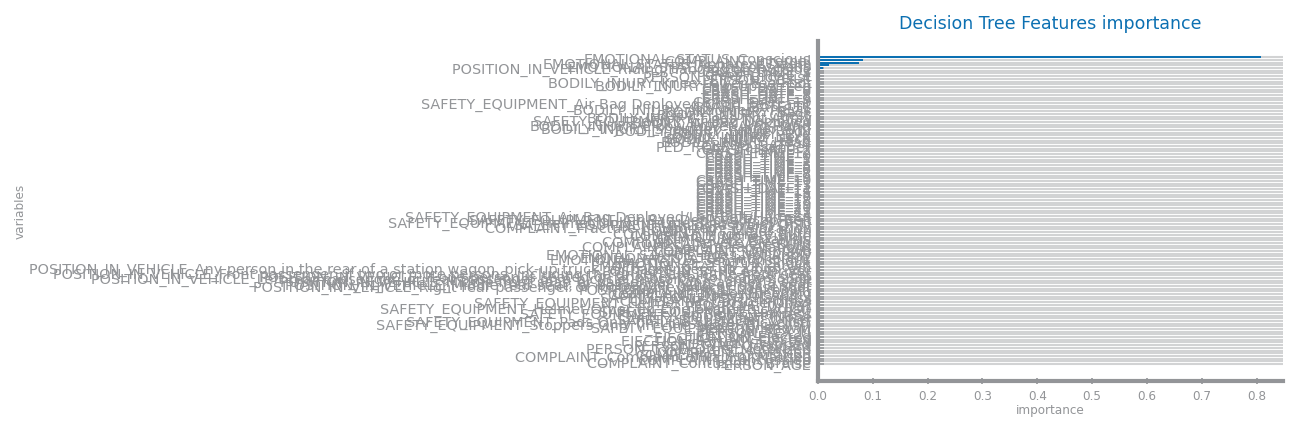

In [29]:
from numpy import argsort, arange
from libs.ds_charts import horizontal_bar_chart
from matplotlib.pyplot import Axes

variables = train.columns
importances = best_model.feature_importances_
indices = argsort(importances)[::-1]
elems = []
imp_values = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, imp_values, error=None, title='Decision Tree Features importance', xlabel='importance', ylabel='variables')
savefig(f'lab5_imagens/{file_tag}_dt_ranking.png')

### KNN Study

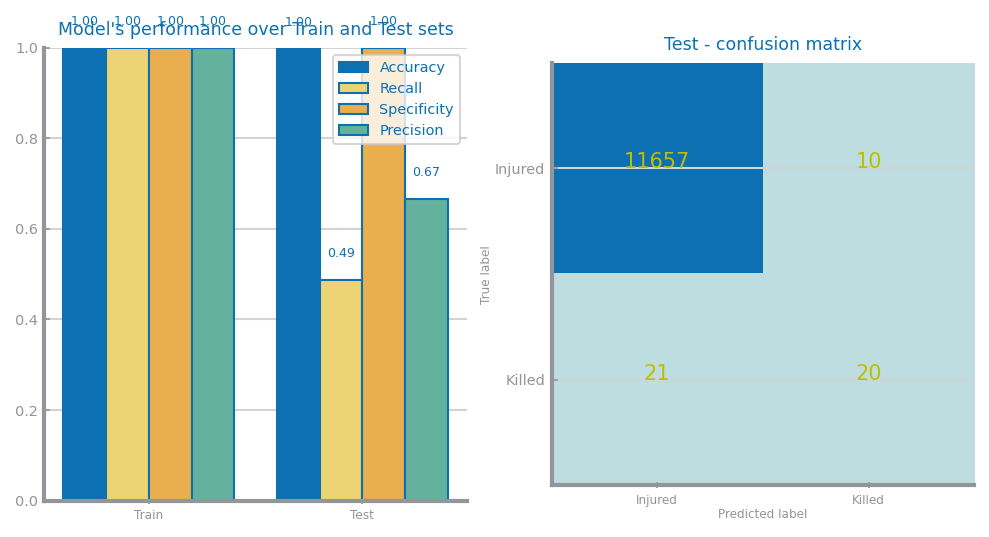

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
show()

### Overfitting

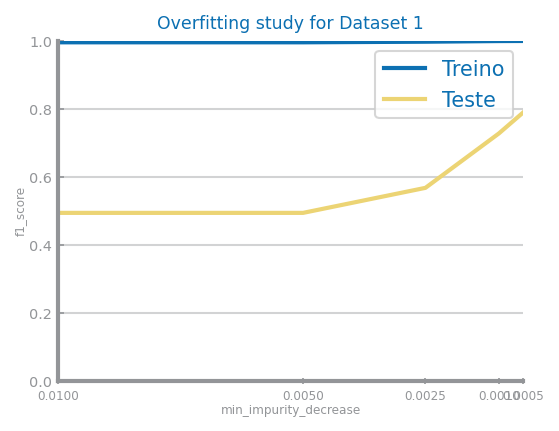

In [15]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
f = criteria[k]
values = {}
yvalues = []
for imp in min_impurity_decrease:
    tree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_impurity_decrease=imp)
    tree.fit(trnX, trnY)
    prdY = tree.predict(trnX)
    yvalues.append(f1_score(trnY, prdY, pos_label = 'Killed'))

values['Treino'] = yvalues
yvalues = []
for imp in min_impurity_decrease:
    tree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_impurity_decrease=imp)
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    yvalues.append(f1_score(tstY, prdY, pos_label = 'Killed'))

values['Teste'] = yvalues
multiple_line_chart(min_impurity_decrease, values, title=f'Overfitting study for Dataset 1',
                           xlabel='min_impurity_decrease', ylabel='f1_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_overfitting_study_f1.png')
show()


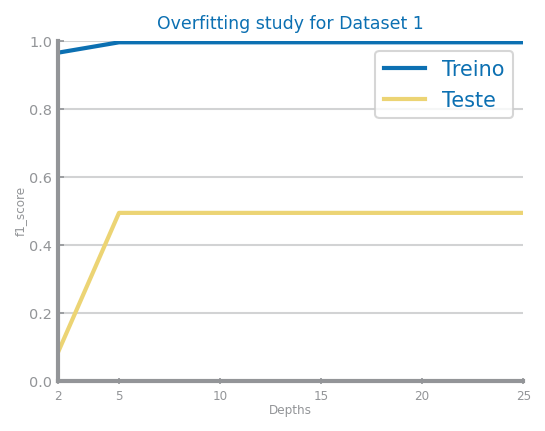

In [21]:
#min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
f = criteria[k]
values = {}
yvalues = []
for imp in max_depths:
    tree = DecisionTreeClassifier(max_depth=imp, criterion='entropy', min_impurity_decrease=0.005)
    tree.fit(trnX, trnY)
    prdY = tree.predict(trnX)
    yvalues.append(f1_score(trnY, prdY, pos_label = 'Killed'))

values['Treino'] = yvalues
yvalues = []
for imp in max_depths:
    tree = DecisionTreeClassifier(max_depth=imp, criterion='entropy', min_impurity_decrease=0.005)
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    yvalues.append(f1_score(tstY, prdY, pos_label = 'Killed'))

values['Teste'] = yvalues

multiple_line_chart(max_depths, values, title=f'Overfitting study for Dataset 1',
                           xlabel='Depths', ylabel='f1_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_overfitting_study_f1.png')

show()

1
5
7
1
5
7


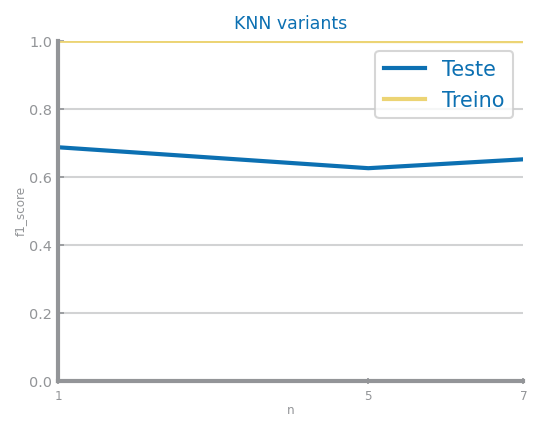

In [22]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

nvalues = [1, 5, 7]#, 9, 11, 13, 15, 17, 19]
dist = 'manhattan'
f1 = {}

yvalues_f1 = []
for n in nvalues:
    print(n)
    knn = KNeighborsClassifier(n_neighbors=n, metric=dist)
    knn.fit(trnX, trnY)
    prdY = knn.predict(tstX)
    yvalues_f1.append(f1_score(tstY, prdY, pos_label='Killed')) ## Using F1 SCORE
             
f1['Teste'] = yvalues_f1
yvalues_f1 = []
for n in nvalues:
    print(n)          
    knn = KNeighborsClassifier(n_neighbors=n, metric=dist)
    knn.fit(trnX, trnY)
    prdY = knn.predict(trnX)    
    yvalues_f1.append(f1_score(trnY, prdY, pos_label='Killed')) ## Using F1 SCORE  
f1['Treino'] = yvalues_f1

figure()
multiple_line_chart(nvalues, f1, title='KNN variants', xlabel='n', ylabel='f1_score', percentage=True)
#savefig('lab3_imagens/air_quality_minmax_knn_f1_study.png')
show()